TASK 2:IMAGE CLASSIFIER SUING PYTORCH

import python dependencies

In [1]:
import torch
import torchvision
import captum
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torchvision.models import resnet50,ResNet50_Weights
model=resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model.eval();

In [3]:
preprocess_func=ResNet50_Weights.IMAGENET1K_V2.transforms()
preprocess_func

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [4]:
categories=np.array(ResNet50_Weights.IMAGENET1K_V2.meta["categories"])
len(categories),categories[:15]

(1000,
 array(['tench', 'goldfish', 'great white shark', 'tiger shark',
        'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich',
        'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting'],
       dtype='<U30'))

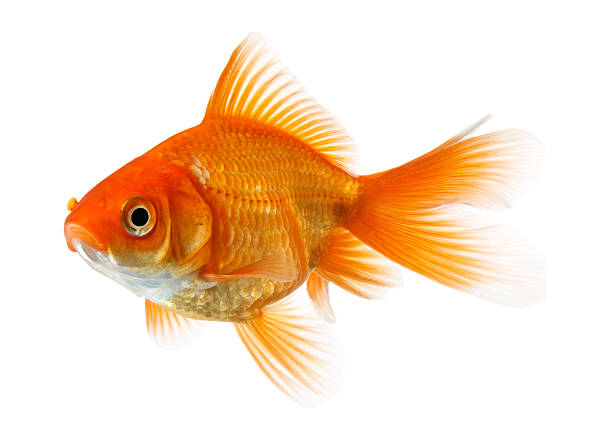

(612, 432)

In [5]:
from PIL import Image
from IPython.display import display
goldfish=Image.open('D:\\machine learning and breast cancer\\goldfish.jpg')
display(goldfish)
goldfish.size

In [6]:
processed_img=preprocess_func(goldfish)
processed_img.shape

torch.Size([3, 224, 224])

In [7]:
probs=model(processed_img.unsqueeze(0))
probs=probs.softmax(1)
probs=probs[0].detach().numpy()

In [8]:
probs=probs[probs.argsort()[-5:][::-1]]
ind=probs.argsort()[-5:][::-1]
probs,ind

(array([0.42208362, 0.00138378, 0.0010596 , 0.00095975, 0.00095839],
       dtype=float32),
 array([0, 1, 2, 3, 4], dtype=int64))

In [9]:
categories[ind]

array(['tench', 'goldfish', 'great white shark', 'tiger shark',
       'hammerhead'], dtype='<U30')

In [10]:
from captum.attr import IntegratedGradients
int_algo=IntegratedGradients(model)

In [11]:
features_imp=int_algo.attribute(processed_img.unsqueeze(0),target=3)
features_imp.shape

torch.Size([1, 3, 224, 224])

In [12]:
features_imp=features_imp[0].numpy()
features_imp=features_imp.transpose(1,2,0)
features_imp.shape

(224, 224, 3)

In [13]:
processed_img_np=processed_img.numpy().transpose(1,2,0)
processed_img_np.shape

(224, 224, 3)

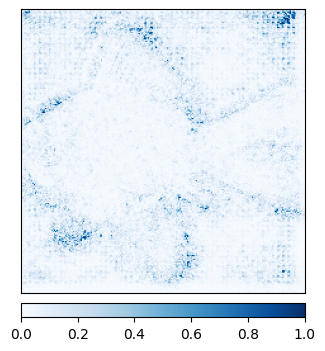

In [14]:
from captum.attr import visualization as viz
fig, ax=viz.visualize_image_attr(features_imp,show_colorbar=True,fig_size=(4,4))

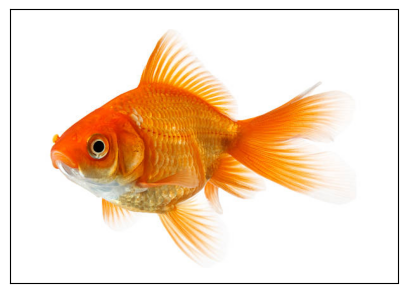

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
plt.imshow(goldfish);
plt.xticks([],[]);
plt.yticks([],[]);